



                                                





                                          








                                 









                              
                                                         






                                       











                          


                                                   




                                             







                                    

                                                      










                                                            



t:   2%|▏         | 4/221 [28:07<00:17, 12.69it/s, now=None]





t:   2%|▏         | 4/221 [15:55<00:11, 19.24it/s, now=None]








t:   2%|▏         | 4/221 [11:30<00:17, 12.37it/s, now=None]









t:   2%|▏         | 4/221 [43:09<00:15, 14.43it/s, now=None]






t:   2%|▏         | 4/221 [14:43<00:13, 16.48it/s, now=None]











t:  96%|█████████▌| 654/681 [03:24<00:02, 11.69it/s, 

Moviepy - Building video /Users/Jerry/Downloads/CarND-Finding_Lane_Lines-master/test_videos_output/challenge.mp41.mp4.
Moviepy - Writing video /Users/Jerry/Downloads/CarND-Finding_Lane_Lines-master/test_videos_output/challenge.mp41.mp4













t:   2%|▏         | 4/221 [43:10<00:15, 14.43it/s, now=None]






t:   2%|▏         | 4/221 [14:43<00:13, 16.48it/s, now=None]











t:  96%|█████████▌| 654/681 [03:24<00:02, 11.69it/s, now=None]


t:   2%|▏         | 4/221 [31:29<00:12, 16.99it/s, now=None]




t:   2%|▏         | 4/221 [18:52<00:12, 16.79it/s, now=None]







t:   2%|▏         | 4/221 [13:08<00:15, 13.86it/s, now=None]

t:   2%|▏         | 4/221 [39:29<00:19, 11.25it/s, now=None]










t:   2%|▏         | 4/221 [45:07<00:13, 16.68it/s, now=None]












t:   0%|          | 0/251 [00:00<?, ?it/s, now=None]












t:   1%|          | 2/251 [00:00<00:24, 10.31it/s, now=None]












t:   1%|          | 3/251 [00:00<00:30,  8.09it/s, now=None]

OverflowError: signed integer is greater than maximum

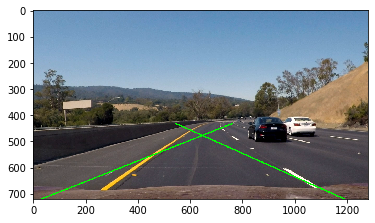

In [30]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from sklearn.linear_model import LinearRegression
import moviepy
import math
from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline


def getMask(img):
    black_bottom=np.zeros_like(img)

    height=img.shape[0]
    width=img.shape[1]
    whiteVertices=np.array([
    [(int(0.08*width),height),(int(0.92*width),height),(int(0.5*width),int(height*0.3))]
    ])
    cv2.fillPoly(black_bottom,whiteVertices,255)
    masked=cv2.bitwise_and(black_bottom,img)
    return masked

def getCoor(leftSlope,leftIntercept,rightSlope,rightIntercept,img):
    bottom_y=img.shape[0]
    top_y=img.shape[0]*0.6
    #y=mx+b
    xlb=(bottom_y-leftIntercept)/leftSlope
    xlt=(top_y-leftIntercept)/leftSlope
    xrb=(bottom_y-rightIntercept)/rightSlope
    xrt=(top_y-rightIntercept)/rightSlope
#     print("here!!!!!")
#     print(xlb)
#     print(xlt)
#     print(xrb)
#     print(xrt)
#     print(bottom_y)
#     print(top_y)
#     print(rightSlope)
    return int(xlb),int(bottom_y),int(xlt),int(top_y),int(xrb),int(bottom_y),int(xrt),int(top_y)
    
    
    
    
def drawlines(rawImg,lineImg):
    black_img=np.zeros_like(rawImg)
    minLineLength=60
    maxLineGap=10
    lines = cv2.HoughLinesP(lineImg, 1, np.pi / 120, 100,minLineLength,maxLineGap)
    if lines[0][0][0].size==0:
        return rawImg
    leftSlope=[]
    rightSlope=[]
    leftIntercept=[]
    rightIntercept=[]
    for line in lines:
        x1,y1,x2,y2=line[0]
        slope,intercept=np.polyfit((x1,x2),(y1,y2),1)
        if slope>0:#left line
            leftSlope=leftSlope+[slope]
            leftIntercept+=[intercept]
        else: #right line
            rightSlope+=[slope]
            rightIntercept+=[intercept]
    leftSlope=np.average(leftSlope)
    rightSlope=np.average(rightSlope)
    if np.isnan(rightSlope)==True:
        return rawImg
    if np.isnan(leftSlope)==True:
        return rawImg    
    leftIntercept=np.average(leftIntercept)
    rightIntercept=np.average(rightIntercept)
    x1,y1,x2,y2,x3,y3,x4,y4=getCoor(leftSlope,leftIntercept,rightSlope,rightIntercept,rawImg)
#     print("lS",leftSlope)
#     print("rS",rightSlope)
#     print("lI",leftIntercept)
#     print("lI",rightIntercept)
        
        
        
    cv2.line(rawImg,(x1,y1),(x2,y2),(0,255,0),3)
    cv2.line(rawImg,(x3,y3),(x4,y4),(0,255,0),3)
    
    return black_img


# img = cv2.imread('/Users/Jerry/Documents/1st Year/暑假/sjtu/0.color_space/ini_img.jpg')
def process_image(img):
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(7,7),0)
    lowThre=80
    highThre=150
    canny=cv2.Canny(blur,lowThre,highThre)
    cropped=getMask(canny)
    HoughLines=drawlines(img,cropped)
    plt.imshow(img)
    return img




white_output = '/Users/Jerry/Downloads/CarND-Finding_Lane_Lines-master/test_videos_output/challenge.mp41.mp4'
clip2 = VideoFileClip('/Users/Jerry/Downloads/CarND-Finding_Lane_Lines-master/test_videos/challenge.mp4')
white_clip = clip2.fl_image(process_image)
%time white_clip.write_videofile(white_output, audio=False)


